In [1]:
import sqlite3
import pandas as pd
import numpy as np

try:
    con = sqlite3.connect('./data/score.db')
except Exception as err:
    print(f"Connection error:\n{err}")

# Extract data as pd.DataFrame
cur = con.cursor()
raw_df = pd.read_sql_query('SELECT * FROM score', con)

# Close db connection
con.close()

In [2]:
# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

C:\Users\ashre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
raw_df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15900 non-null  int64  
 1   number_of_siblings  15900 non-null  int64  
 2   direct_admission    15900 non-null  object 
 3   CCA                 15900 non-null  object 
 4   learning_style      15900 non-null  object 
 5   student_id          15900 non-null  object 
 6   gender              15900 non-null  object 
 7   tuition             15900 non-null  object 
 8   final_test          15405 non-null  float64
 9   n_male              15900 non-null  float64
 10  n_female            15900 non-null  float64
 11  age                 15900 non-null  float64
 12  hours_per_week      15900 non-null  float64
 13  attendance_rate     15122 non-null  float64
 14  sleep_time          15900 non-null  object 
 15  wake_time           15900 non-null  object 
 16  mode

In [5]:
raw_df.isna().any()

index                 False
number_of_siblings    False
direct_admission      False
CCA                   False
learning_style        False
student_id            False
gender                False
tuition               False
final_test             True
n_male                False
n_female              False
age                   False
hours_per_week        False
attendance_rate        True
sleep_time            False
wake_time             False
mode_of_transport     False
bag_color             False
dtype: bool

In [6]:
raw_df.isna().sum()

index                   0
number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
student_id              0
gender                  0
tuition                 0
final_test            495
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       778
sleep_time              0
wake_time               0
mode_of_transport       0
bag_color               0
dtype: int64

Observations with null values will be removed

In [7]:
raw_df[raw_df["attendance_rate"].isna()]

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
9,9,2,No,Arts,Auditory,3MOMA6,Male,Yes,60.0,13.0,9.0,16.0,16.0,NaN,22:30,6:30,private transport,green
58,58,1,No,Clubs,Visual,GF3FCX,Male,No,51.0,19.0,11.0,15.0,18.0,NaN,22:30,6:30,private transport,black
62,62,0,Yes,None,Auditory,68GQ7S,Male,Yes,85.0,12.0,9.0,16.0,8.0,NaN,23:00,7:00,walk,red
85,85,0,No,Arts,Auditory,B6U6DY,Female,Yes,94.0,18.0,3.0,16.0,8.0,NaN,23:00,7:00,walk,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15790,15790,0,No,Clubs,Auditory,GJR1LN,Male,No,61.0,21.0,1.0,15.0,20.0,NaN,22:00,6:00,private transport,green
15827,15827,0,Yes,Arts,Visual,F90UM0,Female,No,84.0,19.0,1.0,16.0,10.0,NaN,23:00,7:00,walk,green
15832,15832,2,No,Arts,Auditory,D5GK79,Male,Yes,74.0,14.0,9.0,15.0,9.0,NaN,21:00,5:00,public transport,black
15854,15854,0,No,Clubs,Auditory,05OOPM,Male,Yes,60.0,19.0,2.0,15.0,10.0,NaN,21:00,5:00,public transport,red


no peculiar traits of those null attendance_rate, will remove together with those null final_test

In [8]:
df = raw_df.copy()

In [9]:
#remove null values
df = df.dropna()

In [10]:
df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
5,5,0,No,Arts,Visual,BA6R14,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow


In [11]:
df["final_test"].min()

32.0

In [12]:
df['learning_style'].unique()

array(['Visual', 'Auditory'], dtype=object)

In [13]:
df['CCA'].unique()

array(['Sports', 'None', 'Arts', 'ARTS', 'Clubs', 'SPORTS', 'CLUBS',
       'NONE'], dtype=object)

In [14]:
df['tuition'].unique()

array(['No', 'Yes', 'Y', 'N'], dtype=object)

In [15]:
df['mode_of_transport'].unique()

array(['private transport', 'public transport', 'walk'], dtype=object)

#clean up CCA and tuition to the desired standardised output

In [16]:
df['CCA'] = df['CCA'].replace("ARTS", "Arts")
df['CCA'] = df['CCA'].replace("CLUBS", "Clubs")
df['CCA'] = df['CCA'].replace("SPORTS", "Sports")
df['CCA'] = df['CCA'].replace("NONE", "None")

In [17]:
df['tuition'] = df['tuition'].replace("Y", "Yes")
df['tuition'] = df['tuition'].replace("N", "No")

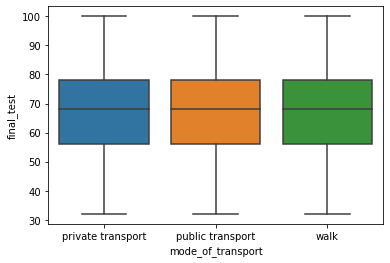

In [18]:
ax = sns.boxplot(x=df["mode_of_transport"], y=df["final_test"])

In [19]:
df['mode_of_transport'].unique()

array(['private transport', 'public transport', 'walk'], dtype=object)

In [20]:
df['direct_admission'].unique()

array(['Yes', 'No'], dtype=object)

Text(0.5, 1.0, 'Gender count')

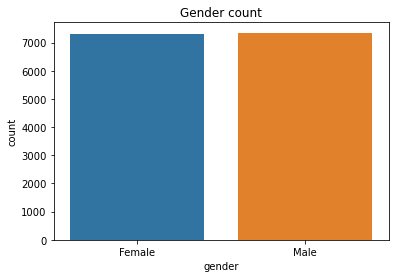

In [21]:
# Explore distribution of gender
plt.figure()
ax = sns.countplot(x = "gender", data = df)
plt.title("Gender count")

gender distribution is equal

Text(0.5, 1.0, 'Age count')

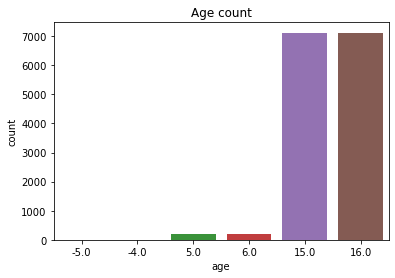

In [22]:
# Explore distribution of age
plt.figure()
ax = sns.countplot(x = "age", data = df)
plt.title("Age count")

some observations with age 5 and 6, will look at the details of this age group

In [23]:
df[df['age'] < 15]

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
60,60,2,No,Arts,Auditory,1B3QSS,Female,Yes,40.0,3.0,19.0,5.0,5.0,98.0,22:00,6:00,private transport,blue
61,61,1,No,Sports,Auditory,D8YD78,Female,Yes,57.0,24.0,6.0,6.0,11.0,95.0,21:30,5:30,public transport,white
81,81,0,No,Clubs,Auditory,ANUEDH,Male,No,57.0,24.0,3.0,5.0,6.0,96.0,22:00,6:00,private transport,white
82,82,0,Yes,None,Visual,7EPPQG,Female,Yes,70.0,1.0,15.0,5.0,10.0,96.0,22:30,6:30,private transport,red
83,83,1,No,Arts,Auditory,EAZDA8,Female,Yes,52.0,21.0,3.0,6.0,8.0,95.0,22:00,6:00,private transport,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15800,15800,0,No,None,Visual,CQC2WW,Female,No,96.0,4.0,15.0,5.0,9.0,94.0,23:00,7:00,walk,blue
15805,15805,1,No,Arts,Auditory,MLOG6P,Male,No,45.0,10.0,14.0,5.0,14.0,95.0,21:30,5:30,public transport,white
15881,15881,1,Yes,Sports,Visual,ODRFL1,Female,Yes,70.0,8.0,13.0,5.0,5.0,97.0,22:00,6:00,private transport,white
15891,15891,1,No,None,Auditory,LEKMPX,Female,Yes,61.0,8.0,16.0,5.0,16.0,95.0,21:30,5:30,public transport,yellow


seems that observations for age 5-6 are useful. Will assume typo error in age and amend it

Text(0.5, 1.0, 'CCA Distribution')

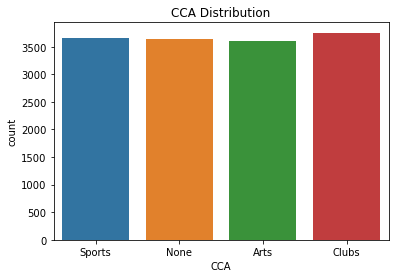

In [24]:
# Explore distribution of age
plt.figure()
ax = sns.countplot(x = "CCA", data = df)
plt.title("CCA Distribution")

In [25]:
df_older = df[df['age'] >= 15]

Text(0.5, 1.0, 'CCA Distribution')

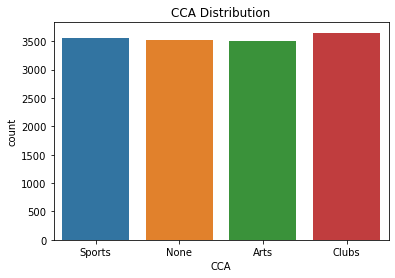

In [26]:
# Explore distribution of age
plt.figure()
ax = sns.countplot(x = "CCA", data = df_older)
plt.title("CCA Distribution")

In [27]:
df_younger = df[df['age'] < 15]

Text(0.5, 1.0, 'CCA Distribution')

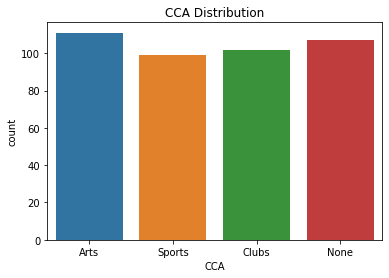

In [28]:
# Explore distribution of CCA for 5 age
plt.figure()
ax = sns.countplot(x = "CCA", data = df_younger)
plt.title("CCA Distribution")

the CCA in caps appear in both category of age, so it is necessary to amend the labels

In [29]:
# change 5 and 6 years old to 15 and 16 years old assuming it has been verified as typo error
df.loc[(raw_df.age == 5), 'age'] = 15
df.loc[(raw_df.age == 6), 'age'] = 16

Text(0.5, 1.0, 'Age distribution')

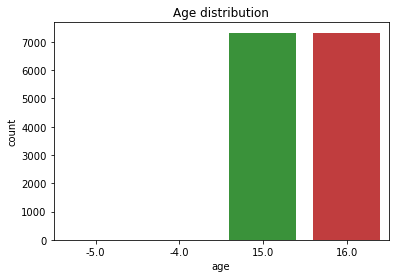

In [30]:
# Explore distribution of age
#plt.figure()
ax = sns.countplot(x = "age", data = df)
plt.title("Age distribution")

age groups amended to age 15 and 16

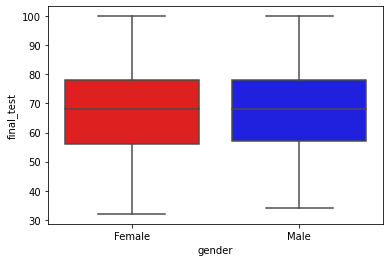

In [31]:
gender_pal = {"Female": "r", "Male": "b"}
ax = sns.boxplot(x=df["gender"], y=df["final_test"], palette = gender_pal)

Female and Male students have similar score distribution

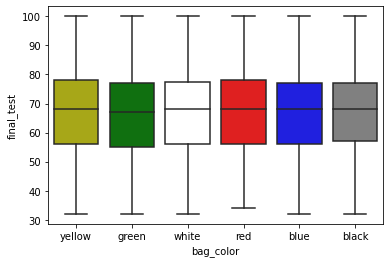

In [32]:
bagcolor = {"yellow": "y", "green": "g", "white":"w", "red":"r", "blue":"b", "black":"grey"}
ax = sns.boxplot(x=df["bag_color"], y=df["final_test"], palette = bagcolor)

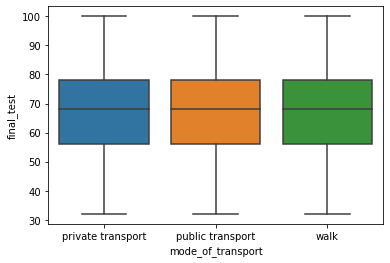

In [33]:
ax = sns.boxplot(x=df["mode_of_transport"], y=df["final_test"])

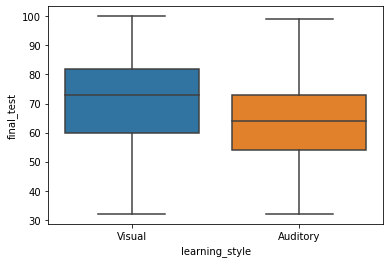

In [34]:
ax = sns.boxplot(x=df["learning_style"], y=df["final_test"])

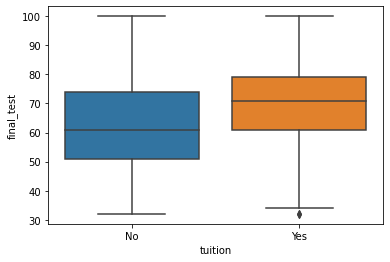

In [35]:
ax = sns.boxplot(x=df["tuition"], y=df["final_test"])

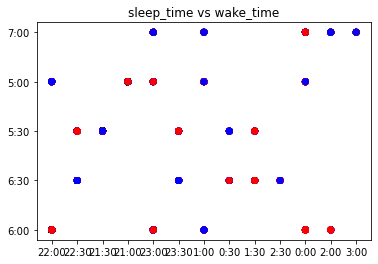

In [36]:
colors = np.where(df["gender"]=='Female','r','b')
plt.scatter(df.sleep_time, df.wake_time, color =colors)
plt.title("sleep_time vs wake_time")
plt.show()

there is no sleeping pattern for both genders

In [37]:
# group based on sleep and wake time
counts = df.groupby(['sleep_time', 'wake_time']).size().reset_index(name='Count')

In [38]:
counts.sort_values(['sleep_time','wake_time'],ascending=False)

#df.sort_values(['sleep_time','wake_time'],ascending=False).groupby(['sleep_time', 'wake_time']).size().reset_index(name='Count')

,sleep_time,wake_time,Count
24,3:00,7:00,21
23,2:30,6:30,24
22,2:00,7:00,45
21,2:00,6:00,33
20,23:30,6:30,120
19,23:30,5:30,53
18,23:00,7:00,2716
17,23:00,6:00,118
16,23:00,5:00,38
15,22:30,6:30,2678


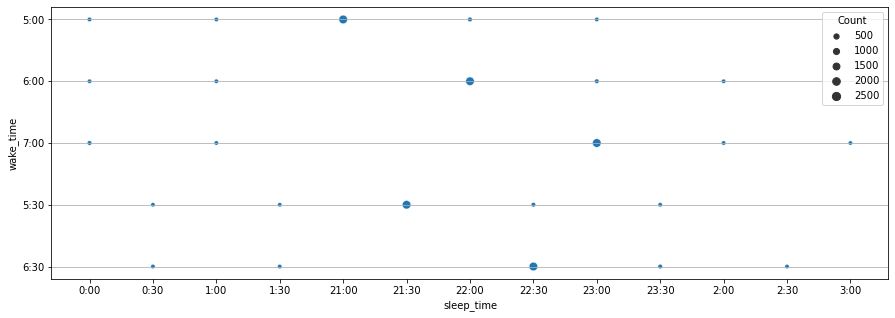

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=counts, x='sleep_time', y='wake_time', size='Count', ax=ax)
ax.grid(axis='y')

In [40]:
#order the axes of the above scatterplot

sorted_sleep_time = ['21:00', '21:30','22:00', '22:30','23:00', '23:30', '0:00','0:30','1:00','1:30','2:00','2:30','3:00']
sorted_wake_time = ['5:00', '5:30', '6:00', '6:30', "7:00"]

In [41]:
#Can only use .cat accessor with a 'category' dtype
counts.sleep_time = counts.sleep_time.astype("category")
counts.sleep_time = counts.sleep_time.cat.set_categories(sorted_sleep_time)

counts.wake_time = counts.wake_time.astype("category")
counts.wake_time = counts.wake_time.cat.set_categories(sorted_wake_time)

counts = counts.sort_values(["sleep_time"])

In [42]:
counts

,sleep_time,wake_time,Count
10,21:00,5:00,2719
11,21:30,5:30,2658
12,22:00,5:00,125
13,22:00,6:00,2694
15,22:30,6:30,2678
14,22:30,5:30,119
18,23:00,7:00,2716
17,23:00,6:00,118
16,23:00,5:00,38
20,23:30,6:30,120


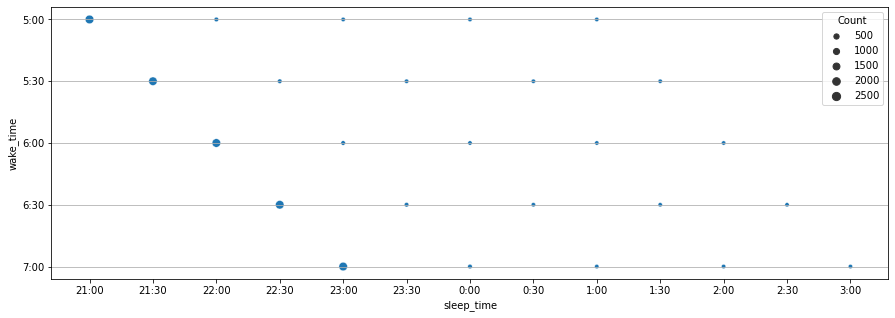

In [43]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=counts, x='sleep_time', y='wake_time', size='Count', ax=ax)
ax.grid(axis='y')

The above scatterplot shows most students have 8 hours of sleep

will do hot encoding on gender, tuition, mode of transport, CCA, learning style, direct admission to do the correlation matrix

In [44]:
X = pd.get_dummies(df, columns = ['CCA', 'learning_style','gender','tuition','mode_of_transport'])

In [45]:
X

,index,number_of_siblings,direct_admission,student_id,final_test,n_male,n_female,age,hours_per_week,attendance_rate,...,CCA_Sports,learning_style_Auditory,learning_style_Visual,gender_Female,gender_Male,tuition_No,tuition_Yes,mode_of_transport_private transport,mode_of_transport_public transport,mode_of_transport_walk
0,0,0,Yes,ACN2BE,69.0,14.0,2.0,16.0,10.0,91.0,...,1,0,1,1,0,1,0,1,0,0
1,1,2,No,FGXIIZ,47.0,4.0,19.0,16.0,7.0,94.0,...,1,1,0,1,0,1,0,1,0,0
2,2,0,Yes,B9AI9F,85.0,14.0,2.0,15.0,8.0,92.0,...,0,0,1,0,1,1,0,1,0,0
4,4,0,No,AXZN2E,66.0,24.0,3.0,16.0,7.0,95.0,...,1,1,0,0,1,1,0,0,1,0
5,5,0,No,BA6R14,57.0,9.0,12.0,15.0,11.0,96.0,...,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,XPECN2,56.0,12.0,14.0,16.0,9.0,96.0,...,0,0,1,1,0,1,0,1,0,0
15896,15896,1,Yes,7AMC7S,85.0,17.0,5.0,16.0,7.0,91.0,...,0,1,0,0,1,0,1,1,0,0
15897,15897,1,Yes,XKZ6VN,76.0,7.0,10.0,15.0,7.0,93.0,...,1,1,0,1,0,0,1,0,0,1
15898,15898,1,No,2OU4UQ,45.0,18.0,12.0,16.0,3.0,94.0,...,0,0,1,0,1,0,1,0,0,1


In [46]:
X = X.drop(["index", "direct_admission", "student_id", "n_male", "n_female", "hours_per_week", "bag_color", "CCA_None", 
            "gender_Male", "learning_style_Auditory", "tuition_No","mode_of_transport_walk" ], axis=1)

In [47]:
# shift column 'Name' to first position 
f_col = X.pop('final_test') 
  
# insert column using insert(position,column_name, first_column) function 
X.insert(0, 'final_test', f_col) 

In [48]:
X

,final_test,number_of_siblings,age,attendance_rate,sleep_time,wake_time,CCA_Arts,CCA_Clubs,CCA_Sports,learning_style_Visual,gender_Female,tuition_Yes,mode_of_transport_private transport,mode_of_transport_public transport
0,69.0,0,16.0,91.0,22:00,6:00,0,0,1,1,1,0,1,0
1,47.0,2,16.0,94.0,22:30,6:30,0,0,1,0,1,0,1,0
2,85.0,0,15.0,92.0,22:30,6:30,0,0,0,1,0,0,1,0
4,66.0,0,16.0,95.0,21:30,5:30,0,0,1,0,0,0,0,1
5,57.0,0,15.0,96.0,22:30,6:30,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,56.0,1,16.0,96.0,22:00,6:00,0,1,0,1,1,0,1,0
15896,85.0,1,16.0,91.0,22:30,6:30,0,0,0,0,0,1,1,0
15897,76.0,1,15.0,93.0,23:00,7:00,0,0,1,0,1,1,0,0
15898,45.0,1,16.0,94.0,23:00,7:00,0,1,0,1,0,1,0,0


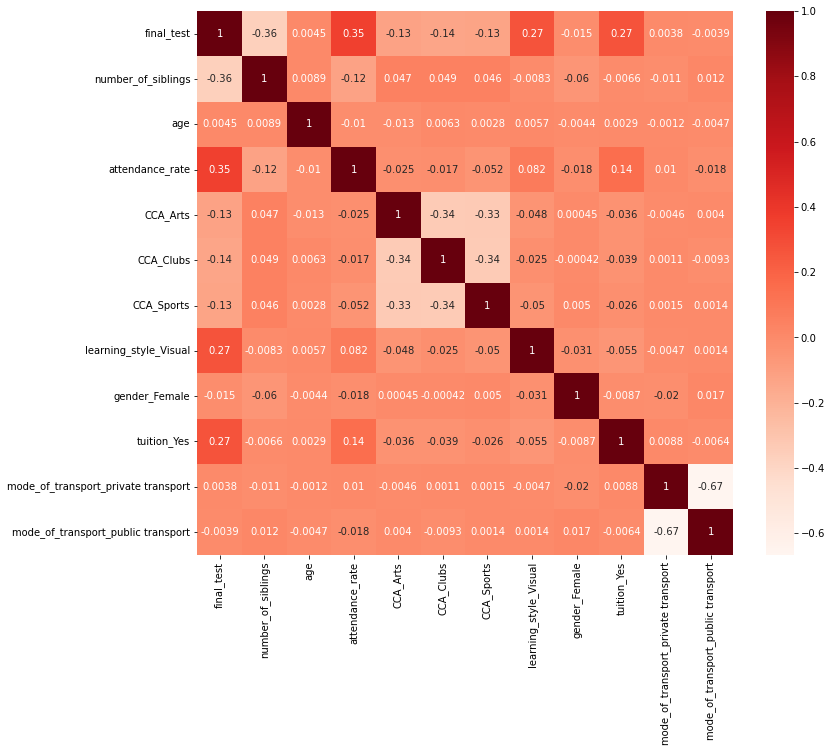

In [49]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

There is no high collinearity among the attributes